In [37]:
# TSP using Dynamic Programming

In [26]:
import time
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def DP_TSP(distances_array):
    n = len(distances_array)
    all_points_set = set(range(n))

    # memo keys: tuple(sorted_points_in_path, last_point_in_path)
    # memo values: tuple(cost_thus_far, next_to_last_point_in_path)
    memo = {(tuple([i]), i): tuple([0, None]) for i in range(n)}
    queue = [(tuple([i]), i) for i in range(n)]

    while queue:
        prev_visited, prev_last_point = queue.pop(0)
        prev_dist, _ = memo[(prev_visited, prev_last_point)]

        to_visit = all_points_set.difference(set(prev_visited))
        for new_last_point in to_visit:
            new_visited = tuple(sorted(list(prev_visited) + [new_last_point]))
            new_dist = prev_dist + distances_array[prev_last_point][new_last_point]

            if (new_visited, new_last_point) not in memo:
                memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)
                queue += [(new_visited, new_last_point)]
            else:
                if new_dist < memo[(new_visited, new_last_point)][0]:
                    memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)

    optimal_path, optimal_cost = retrace_optimal_path(memo, n)

    return optimal_path, optimal_cost

In [28]:
def retrace_optimal_path(memo: dict, n: int) -> [[int], float]:
    points_to_retrace = tuple(range(n))

    full_path_memo = dict((k, v) for k, v in memo.items() if k[0] == points_to_retrace)
    path_key = min(full_path_memo.keys(), key=lambda x: full_path_memo[x][0])

    last_point = path_key[1]
    optimal_cost, next_to_last_point = memo[path_key]

    optimal_path = [last_point]
    points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    while next_to_last_point is not None:
        last_point = next_to_last_point
        path_key = (points_to_retrace, last_point)
        _, next_to_last_point = memo[path_key]

        optimal_path = [last_point] + optimal_path
        points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    return optimal_path, optimal_cost

In [29]:
def plot_route(X, optimal_path):
    for p1, p2 in zip(optimal_path[:-1], optimal_path[1:]):
        plt.plot([X[p1, 0], X[p2,0]],[X[p1,1], X[p2,1]]);

In [30]:
def generate_random_input(n_points):
    X = np.random.rand(n_points, 2)
    distances_array = np.array([[np.linalg.norm(X[i]-X[j])
                                for i in range(n_points)]
                               for j in range(n_points)])
    return X, distances_array

In [31]:
input_size = 12
X, distances_array = generate_random_input(input_size)

t = time.time()
optimal_path, optimal_cost = DP_TSP(distances_array)
runtime = round(time.time() - t, 3)

print(f"Found optimal path in {runtime} seconds.") 
print(f"Optimal cost: {round(optimal_cost, 3)}, optimal path: {optimal_path}")

Found optimal path in 0.341 seconds.
Optimal cost: 2.484, optimal path: [5, 3, 0, 4, 1, 6, 10, 9, 8, 11, 7, 2]


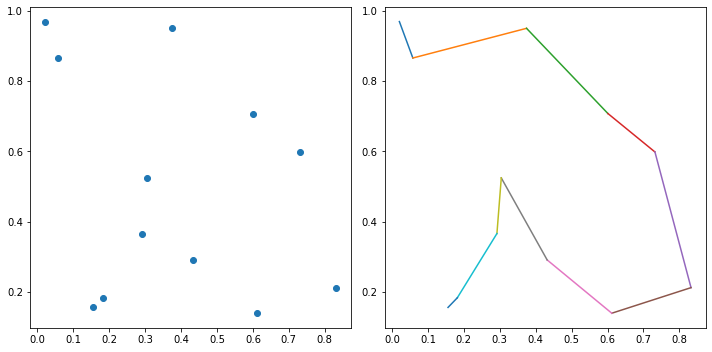

In [32]:
plt.figure(figsize=(10, 5));

plt.subplot(1, 2, 1);
plt.scatter(X[:, 0], X[:, 1]);

plt.subplot(1, 2, 2);
plot_route(X, optimal_path)

plt.tight_layout();